## Face Detection

In [1]:
import numpy as np

import cv2

import matplotlib.pyplot as plt

In [2]:
face_classifier = cv2.CascadeClassifier('./Haarcascades/haarcascade_frontalface_default.xml')

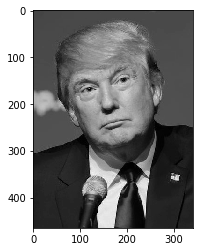

In [3]:
image = cv2.imread('./Section6Images/Trump.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap = "gray")

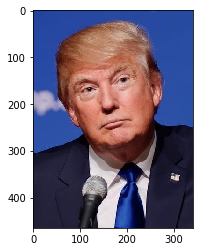

In [4]:
rgbimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(rgbimage)

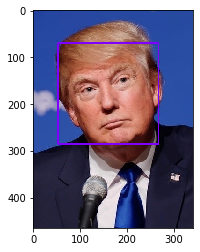

In [5]:
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

if faces is () :
    
    print("No faces found")

for (x,y,w,h) in faces :
    
    cv2.rectangle(rgbimage, (x,y), (x + w,y + h), (127,0,255), 2)
    
    plt.imshow(rgbimage)

## Face & Eye Detection

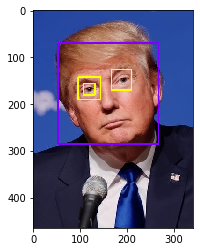

In [6]:
face_classifier = cv2.CascadeClassifier('./Haarcascades/haarcascade_frontalface_default.xml')

eye_classifier = cv2.CascadeClassifier('./Haarcascades/haarcascade_eye.xml')
 
image = cv2.imread('./Section6Images/Trump.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

rgbimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)


if faces is () :
    
    print("No Face Found")

for (x,y,w,h) in faces :
    
    cv2.rectangle(rgbimage,(x,y),(x + w,y + h),(127,0,255), 2)
    
    plt.imshow(rgbimage)
    
    roi_gray = gray[y : y + h, x : x + w]
    
    roi_color = rgbimage[y : y + h, x : x + w]
    
    eyes = eye_classifier.detectMultiScale(roi_gray)
    
    for (ex,ey,ew,eh) in eyes :
        
        cv2.rectangle(roi_color,(ex,ey),(ex + ew,ey + eh),(255,255,0),2)
        
        plt.imshow(rgbimage)

## Live Face & Eye Detection

In [7]:
face_classifier = cv2.CascadeClassifier('./Haarcascades/haarcascade_frontalface_default.xml')

eye_classifier = cv2.CascadeClassifier('./Haarcascades/haarcascade_eye.xml')

def face_detector(image, size = 0.5) :
    
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    rgbimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    
    if faces is () :
        
        return image
    
    for (x,y,w,h) in faces :
        
        x = x - 50
        
        w = w + 50
        
        y = y - 50
        
        h = h + 50
        cv2.rectangle(image,(x,y),(x + w,y + h),(255,0,0),2)
        
        roi_gray = gray[y:y + h, x : x + w]
        
        roi_color = rgbimage[y : y + h, x : x + w]
        
        eyes = eye_classifier.detectMultiScale(roi_color)
        
        for (ex,ey,ew,eh) in eyes :
            
            cv2.rectangle(roi_color,(ex,ey),(ex + ew,ey + eh),(0,0,255),2) 
            
    roi_color = cv2.flip(roi_color,1)
    
    return roi_color

cap = cv2.VideoCapture(0)

while True :

    ret, frame = cap.read()
    
    cv2.imshow('Our Face Extractor', face_detector(frame))
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        
        break
        
cap.release()

cv2.destroyAllWindows()      